Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset

In [354]:
churn_master_data = pd.read_csv('../dataset/wls_churn_master_target_t1.csv')
customer_demographic_data = pd.read_csv('../dataset/wls_customer_demographics_t1.csv')
billing_data = pd.read_csv('../dataset/wls_billing.csv')

### Data Exploration

#### churn_master_data

In [4]:
churn_master_data.head()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn
0,0,161.66,131.66,130.00,2,2,0,131.66,0.0
1,1,46.92,45.00,35.00,1,0,1,46.92,0.0
2,2,229.15,229.15,155.00,2,2,0,229.15,0.0
3,3,101.53,91.53,75.00,1,1,0,91.53,0.0
4,4,559.90,460.39,330.97,6,4,2,475.55,1.0


In [5]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      9590 non-null   int64  
 1   mrc_current_month                9590 non-null   float64
 2   mvsf_br_amt_current_month        9581 non-null   float64
 3   mvsf_mrc_current_month           9590 non-null   float64
 4   num_subs_current_month           9590 non-null   int64  
 5   num_voice_subs_current_month     9590 non-null   int64  
 6   num_nonvoice_subs_current_month  9590 non-null   int64  
 7   rev_current_month                9590 non-null   float64
 8   churn                            9590 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 674.4 KB


In [6]:
churn_master_data.columns

Index(['Customer_ID', 'mrc_current_month', 'mvsf_br_amt_current_month',
       'mvsf_mrc_current_month', 'num_subs_current_month',
       'num_voice_subs_current_month', 'num_nonvoice_subs_current_month',
       'rev_current_month', 'churn'],
      dtype='object')

In [7]:
churn_master_data.shape

(9590, 9)

#### customer_demographic_data

In [8]:
customer_demographic_data.head()

,Customer_ID,n_distinct_srvc_prov_state_cd_current_month,n_distinct_sls_indust_typ_txt_current_month,n_distinct_clli_exch_cd_current_month,n_distinct_billg_prov_state_cd_current_month,n_distinct_pymt_mthd_cd_current_month,n_distinct_rgnl_cust_prov_state_cd_current_month,n_distinct_cbu_cust_prov_state_cd_current_month,srvc_prov_state_cd_ab_ind_current_month,srvc_prov_state_cd_bc_ind_current_month,...,pymt_mthd_cd_tbsqbsb_ind_current_month,pymt_mthd_cd_tbsqbsh_ind_current_month,pymt_mthd_cd_tcso_ind_current_month,pymt_mthd_cd_tcsobpr_ind_current_month,pymt_mthd_cd_tcsoothr_ind_current_month,pymt_mthd_cd_tcsqothr_ind_current_month,pymt_mthd_cd_teso_ind_current_month,pymt_mthd_cd_tesobsb_ind_current_month,pymt_mthd_cd_tesoothr_ind_current_month,pymt_mthd_cd_tpsoothr_ind_current_month
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
customer_demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 93 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer_ID                                       9590 non-null   int64
 1   n_distinct_srvc_prov_state_cd_current_month       9590 non-null   int64
 2   n_distinct_sls_indust_typ_txt_current_month       9590 non-null   int64
 3   n_distinct_clli_exch_cd_current_month             9590 non-null   int64
 4   n_distinct_billg_prov_state_cd_current_month      9590 non-null   int64
 5   n_distinct_pymt_mthd_cd_current_month             9590 non-null   int64
 6   n_distinct_rgnl_cust_prov_state_cd_current_month  9590 non-null   int64
 7   n_distinct_cbu_cust_prov_state_cd_current_month   9590 non-null   int64
 8   srvc_prov_state_cd_ab_ind_current_month           9590 non-null   int64
 9   srvc_prov_state_cd_bc_ind_current_month  

In [10]:
customer_demographic_data.columns

Index(['Customer_ID', 'n_distinct_srvc_prov_state_cd_current_month',
       'n_distinct_sls_indust_typ_txt_current_month',
       'n_distinct_clli_exch_cd_current_month',
       'n_distinct_billg_prov_state_cd_current_month',
       'n_distinct_pymt_mthd_cd_current_month',
       'n_distinct_rgnl_cust_prov_state_cd_current_month',
       'n_distinct_cbu_cust_prov_state_cd_current_month',
       'srvc_prov_state_cd_ab_ind_current_month',
       'srvc_prov_state_cd_bc_ind_current_month',
       'srvc_prov_state_cd_mb_ind_current_month',
       'srvc_prov_state_cd_nb_ind_current_month',
       'srvc_prov_state_cd_nl_ind_current_month',
       'srvc_prov_state_cd_ns_ind_current_month',
       'srvc_prov_state_cd_nt_ind_current_month',
       'srvc_prov_state_cd_nu_ind_current_month',
       'srvc_prov_state_cd_on_ind_current_month',
       'srvc_prov_state_cd_pe_ind_current_month',
       'srvc_prov_state_cd_qc_ind_current_month',
       'srvc_prov_state_cd_sk_ind_current_month',
       's

In [11]:
customer_demographic_data.shape

(9590, 93)

#### billing_data

In [12]:
billing_data.head()

,Customer_ID,write_off_ind_n_ind_current_month,write_off_ind_y_ind_current_month,payment_method_cd_c_ind_current_month,payment_method_cd_ca_ind_current_month,payment_method_cd_cc_ind_current_month,payment_method_cd_d_ind_current_month,payment_method_cd_dd_ind_current_month,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
billing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Customer_ID                                    9590 non-null   int64
 1   write_off_ind_n_ind_current_month              9590 non-null   int64
 2   write_off_ind_y_ind_current_month              9590 non-null   int64
 3   payment_method_cd_c_ind_current_month          9590 non-null   int64
 4   payment_method_cd_ca_ind_current_month         9590 non-null   int64
 5   payment_method_cd_cc_ind_current_month         9590 non-null   int64
 6   payment_method_cd_d_ind_current_month          9590 non-null   int64
 7   payment_method_cd_dd_ind_current_month         9590 non-null   int64
 8   payment_method_cd_r_ind_current_month          9590 non-null   int64
 9   kb_payment_method_cd_c_ind_current_month       9590 non-null   int64
 10  

In [14]:
billing_data.columns

Index(['Customer_ID', 'write_off_ind_n_ind_current_month',
       'write_off_ind_y_ind_current_month',
       'payment_method_cd_c_ind_current_month',
       'payment_method_cd_ca_ind_current_month',
       'payment_method_cd_cc_ind_current_month',
       'payment_method_cd_d_ind_current_month',
       'payment_method_cd_dd_ind_current_month',
       'payment_method_cd_r_ind_current_month',
       'kb_payment_method_cd_c_ind_current_month',
       'kb_payment_method_cd_d_ind_current_month',
       'kb_payment_method_cd_r_ind_current_month',
       'auto_payment_method_cd_ca_ind_current_month',
       'auto_payment_method_cd_cc_ind_current_month',
       'auto_payment_method_cd_dd_ind_current_month',
       'kb_auto_payment_method_cd_c_ind_current_month',
       'kb_auto_payment_method_cd_d_ind_current_month',
       'kb_auto_payment_method_cd_r_ind_current_month'],
      dtype='object')

In [15]:
billing_data.shape

(9590, 18)

### Merge Data Frames

In [355]:
churn_master_data = churn_master_data.merge(customer_demographic_data, on=['Customer_ID'], how='outer')

churn_master_data = churn_master_data.merge(billing_data, on=['Customer_ID'], how='outer')

In [356]:
churn_master_data.shape

(9590, 118)

## Data Analysis

### Null Value

In [357]:
null_columns = churn_master_data.columns[churn_master_data.isnull().any()]
churn_master_data[null_columns].isnull().sum()

mvsf_br_amt_current_month    9
dtype: int64

Handling Null Values with "Most Frequent Value"

In [358]:
churn_master_data['mvsf_br_amt_current_month'] = churn_master_data['mvsf_br_amt_current_month'].fillna(churn_master_data['mvsf_br_amt_current_month'].mode().iloc[0])

In [359]:
null_columns = churn_master_data.columns[churn_master_data.isnull().any()]
churn_master_data[null_columns].isnull().sum()

Series([], dtype: float64)

### How Target Value Unbalanced?

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\151419662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="churn", data=churn_master_data, palette="Set1")


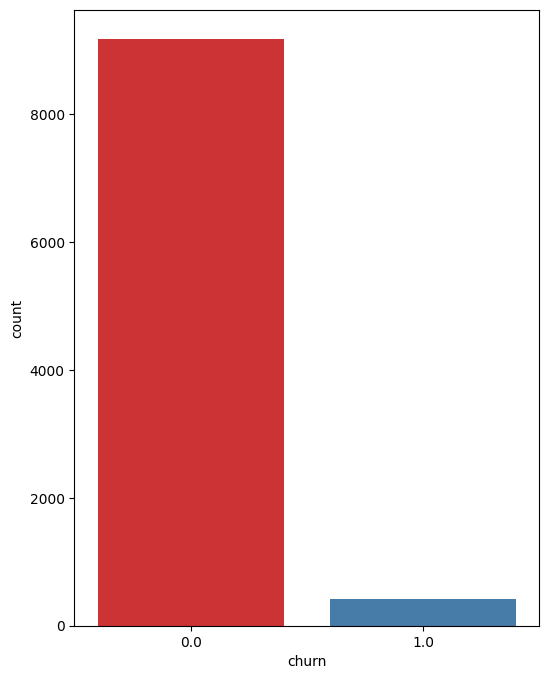

In [26]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="churn", data=churn_master_data, palette="Set1")
plt.show()

### Correlation

In [360]:
correlation_matrix = churn_master_data.corr()

Most Positive Correlation

In [361]:
top_positive_correlation = correlation_matrix['churn'].sort_values(ascending=False).head(11)[1:]

print("Top 10 features with highest positive correlation with 'churn':")
print(top_positive_correlation)

Top 10 features with highest positive correlation with 'churn':
billg_prov_state_cd_on_ind_current_month         0.036393
payment_method_cd_c_ind_current_month            0.029668
auto_payment_method_cd_cc_ind_current_month      0.029668
kb_auto_payment_method_cd_c_ind_current_month    0.029668
mvsf_mrc_current_month                           0.023132
mrc_current_month                                0.021172
num_subs_current_month                           0.020916
num_voice_subs_current_month                     0.020543
mvsf_br_amt_current_month                        0.020400
rev_current_month                                0.019920
Name: churn, dtype: float64


In [362]:
top_positive_correlation_features = list(top_positive_correlation.index)

print("Top 10 features with highest negative correlation with 'churn':")
print(top_positive_correlation_features)

Top 10 features with highest negative correlation with 'churn':
['billg_prov_state_cd_on_ind_current_month', 'payment_method_cd_c_ind_current_month', 'auto_payment_method_cd_cc_ind_current_month', 'kb_auto_payment_method_cd_c_ind_current_month', 'mvsf_mrc_current_month', 'mrc_current_month', 'num_subs_current_month', 'num_voice_subs_current_month', 'mvsf_br_amt_current_month', 'rev_current_month']


Most Negetive Correlation

In [363]:
top_negative_correlation = correlation_matrix['churn'].sort_values(ascending=True).head(10)

print("Top 10 features with highest negative correlation with 'churn':")
print(top_negative_correlation)

Top 10 features with highest negative correlation with 'churn':
billg_prov_state_cd_ab_ind_current_month        -0.027813
kb_payment_method_cd_r_ind_current_month        -0.018175
auto_payment_method_cd_dd_ind_current_month     -0.014294
kb_auto_payment_method_cd_d_ind_current_month   -0.014294
payment_method_cd_d_ind_current_month           -0.014294
billg_prov_state_cd_sk_ind_current_month        -0.012591
cbu_cust_prov_state_cd_on_ind_current_month     -0.011941
kb_auto_payment_method_cd_r_ind_current_month   -0.011846
auto_payment_method_cd_ca_ind_current_month     -0.011846
payment_method_cd_r_ind_current_month           -0.011846
Name: churn, dtype: float64


In [364]:
top_negative_correlation_features = list(top_negative_correlation.index)

print("Top 10 features with highest negative correlation with 'churn':")
print(top_negative_correlation_features)

Top 10 features with highest negative correlation with 'churn':
['billg_prov_state_cd_ab_ind_current_month', 'kb_payment_method_cd_r_ind_current_month', 'auto_payment_method_cd_dd_ind_current_month', 'kb_auto_payment_method_cd_d_ind_current_month', 'payment_method_cd_d_ind_current_month', 'billg_prov_state_cd_sk_ind_current_month', 'cbu_cust_prov_state_cd_on_ind_current_month', 'kb_auto_payment_method_cd_r_ind_current_month', 'auto_payment_method_cd_ca_ind_current_month', 'payment_method_cd_r_ind_current_month']


### Analyze Most Important Positive Correlations (churn Transaction):

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[id

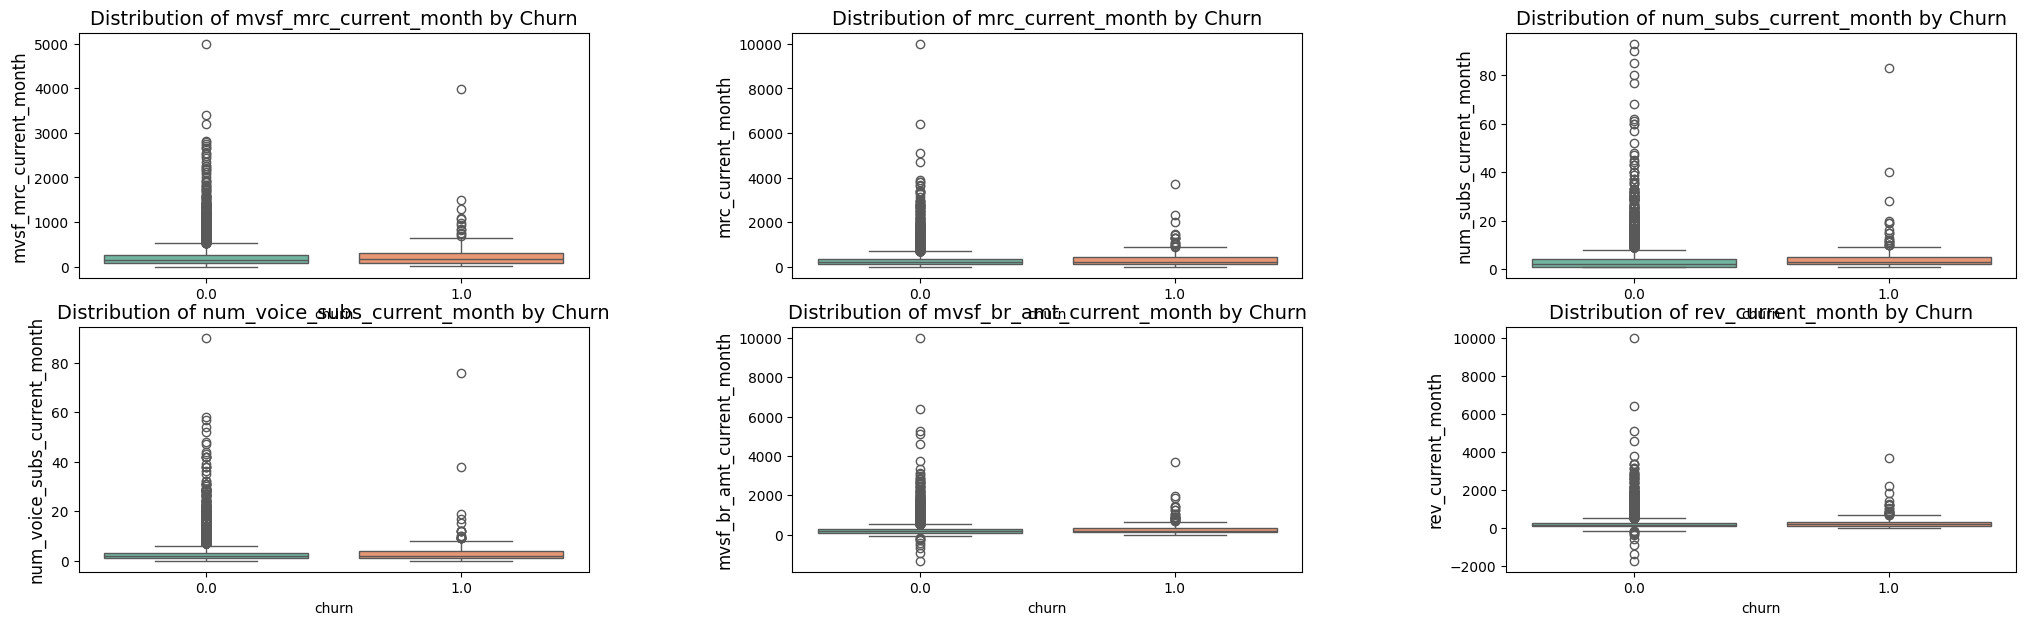

In [128]:
corr_columns = top_positive_correlation_features[4:]

fig, axes = plt.subplots(2, 3, figsize=(25, 7))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Churn', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

In [365]:
def remove_outliers_for_churn_1(df, column):
    Q1 = df[df['churn'] == 1][column].quantile(0.25)
    Q3 = df[df['churn'] == 1][column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [366]:
for feature in top_positive_correlation_features[4:]:
    churn_master_data = remove_outliers_for_churn_1(churn_master_data, feature)

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\1850962778.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[id

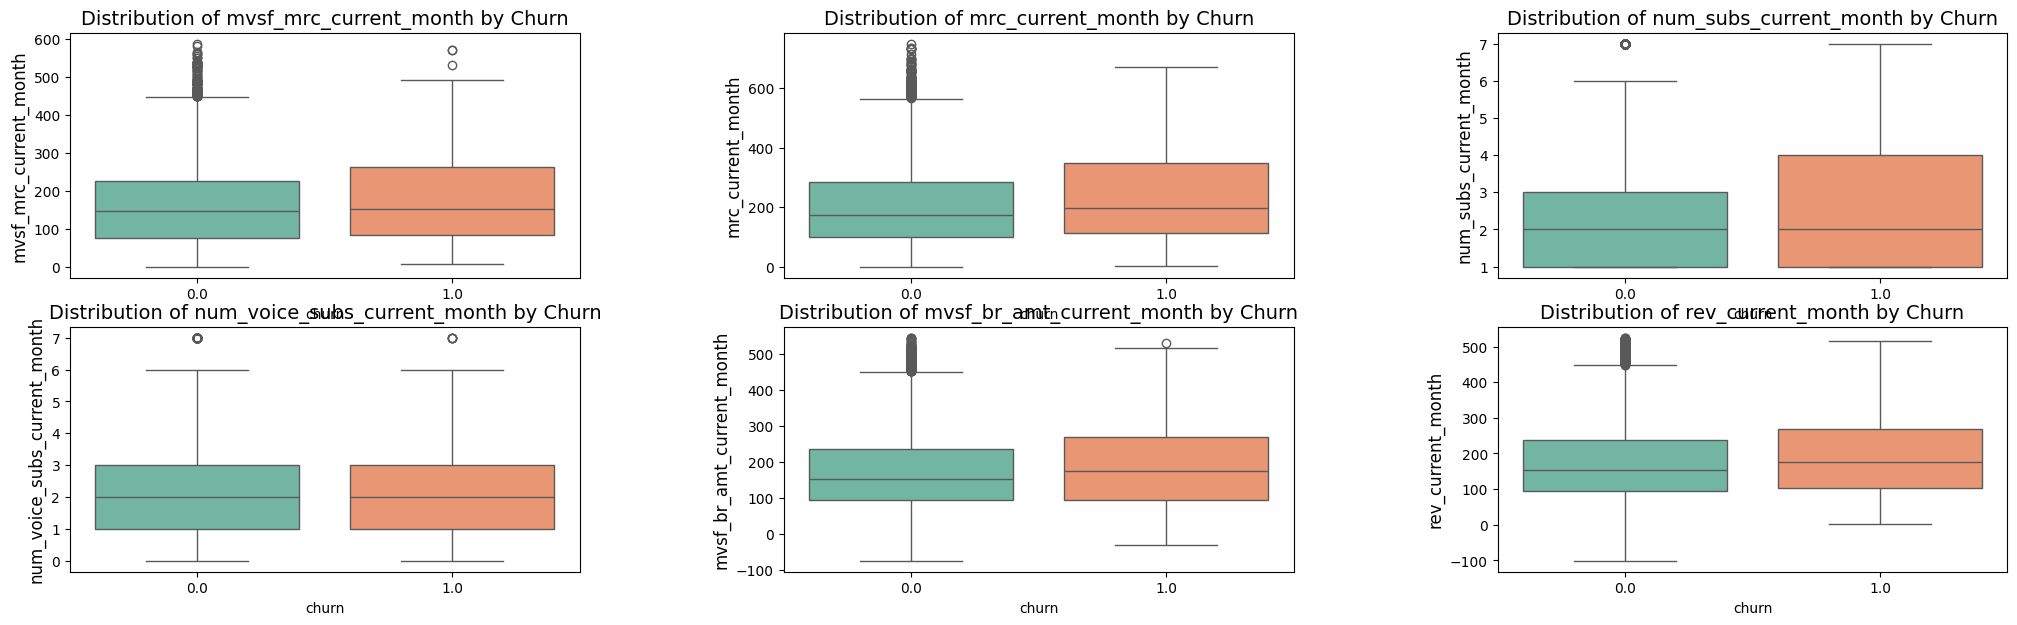

In [248]:
corr_columns = top_positive_correlation_features[4:]

fig, axes = plt.subplots(2, 3, figsize=(25, 7))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Churn', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

### Analyze Most Important Negative Correlations (churn Transaction):

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\3961226988.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\3961226988.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\3961226988.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[id

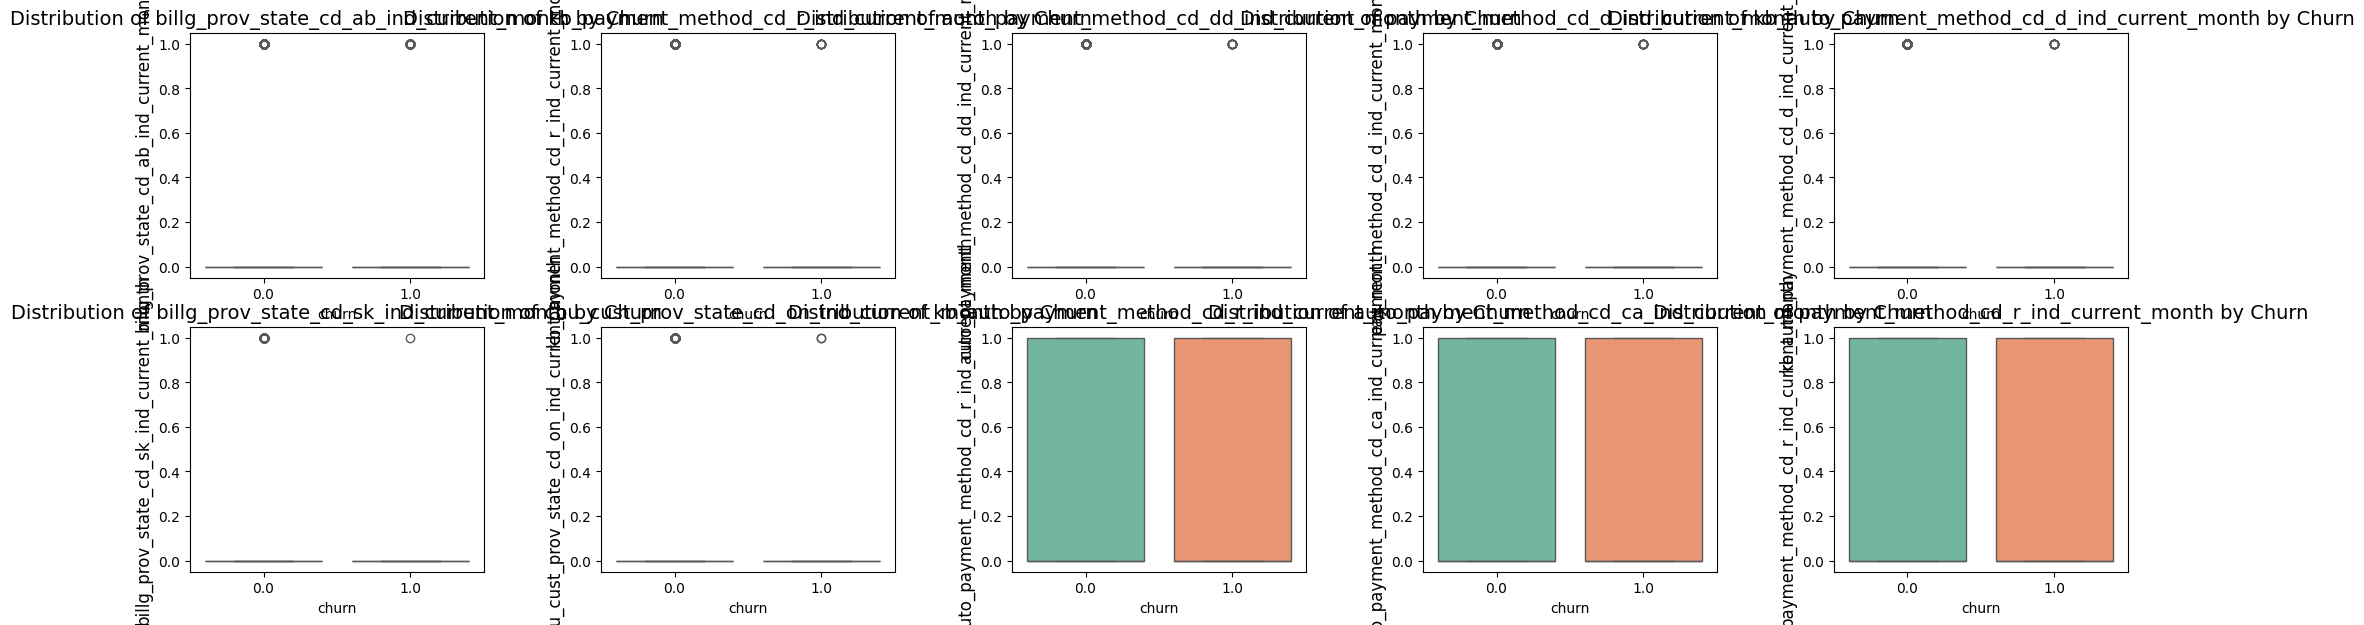

In [131]:
corr_columns = top_negative_correlation_features

fig, axes = plt.subplots(2, 5, figsize=(25, 7))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns for visualization
for idx, num_col in enumerate(corr_columns):
    sns.boxplot(x='churn', y=num_col, data=churn_master_data, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribution of {num_col} by Churn', fontsize=14)
    axes[idx].set_ylabel(num_col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

## Preprocessing Data

#### Drop Unneccesery column

In [367]:
ind_col = top_positive_correlation_features + top_negative_correlation_features
dep_col = 'churn'

X = churn_master_data[ind_col]
y = churn_master_data[dep_col]

#### Splitting dataset into train and test

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6944, 20), (6944,), (1736, 20), (1736,))

### Address Unbalanced Issue Using Oversampling Methods

In [252]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 4)
X_os, y_os = sm.fit_resample(X_train, y_train)

X_os.shape

(13326, 20)

In [253]:
dataset_Oversampling = pd.concat([X_os, y_os], axis=1)

Ckecking Class Distributions

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\3006616834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="churn", data=dataset_Oversampling, palette="Set1")


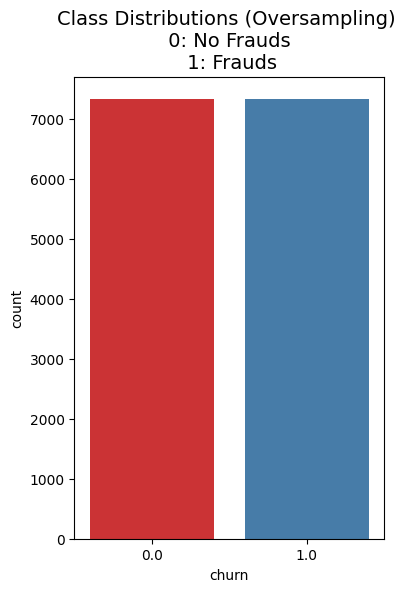

In [61]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="churn", data=dataset_Oversampling, palette="Set1")
plt.title('Class Distributions (Oversampling) \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

In [254]:
ind_col = [col for col in dataset_Oversampling.columns if col != 'churn']
dep_col = 'churn'

X_train = dataset_Oversampling[ind_col]
y_train = dataset_Oversampling[dep_col]

# Models

## XGBoost

In [255]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [256]:
train_score = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9215852743673724
Accuracy: 0.8640552995391705


In [257]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.08527131782945736
Recall Score: 0.13
Precision Score: 0.06


Confusion Matrix

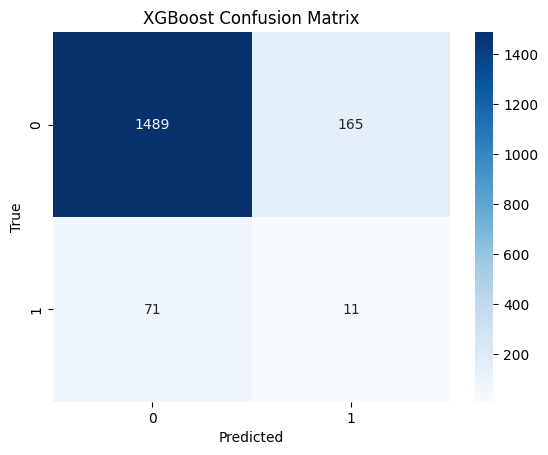

In [152]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Features Driving from XGBoost

In [258]:
importance_scores_xgb = xgb_clf.feature_importances_
important_features_xgb = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance Score": importance_scores_xgb
})

important_features_xgb = important_features_xgb.sort_values(by="Importance Score", ascending=False)\

important_features_xgb.head(10)

,Feature Name,Importance Score
10,billg_prov_state_cd_ab_ind_current_month,0.250767
12,auto_payment_method_cd_dd_ind_current_month,0.225035
1,payment_method_cd_c_ind_current_month,0.107851
17,kb_auto_payment_method_cd_r_ind_current_month,0.088801
11,kb_payment_method_cd_r_ind_current_month,0.064069
0,billg_prov_state_cd_on_ind_current_month,0.048797
16,cbu_cust_prov_state_cd_on_ind_current_month,0.038289
15,billg_prov_state_cd_sk_ind_current_month,0.036911
7,num_voice_subs_current_month,0.033912
4,mvsf_mrc_current_month,0.024849


In [259]:
zero_importance_features_xgb = important_features_xgb[important_features_xgb["Importance Score"] == 0]["Feature Name"].tolist()
print(zero_importance_features_xgb)
print(len(zero_importance_features_xgb))

['kb_auto_payment_method_cd_c_ind_current_month', 'kb_auto_payment_method_cd_d_ind_current_month', 'payment_method_cd_d_ind_current_month', 'auto_payment_method_cd_cc_ind_current_month', 'auto_payment_method_cd_ca_ind_current_month', 'payment_method_cd_r_ind_current_month']
6


Keep Just 5 top feature

In [260]:
top_xgb_features = list(important_features_xgb['Feature Name'].head(5))
print(top_xgb_features)

['billg_prov_state_cd_ab_ind_current_month', 'auto_payment_method_cd_dd_ind_current_month', 'payment_method_cd_c_ind_current_month', 'kb_auto_payment_method_cd_r_ind_current_month', 'kb_payment_method_cd_r_ind_current_month']


## Random Forest

In [261]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [263]:
train_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.9305906776881837
Accuracy: 0.8847926267281107


In [264]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.08256880733944955
Recall Score: 0.11
Precision Score: 0.07


Confusion Matrix

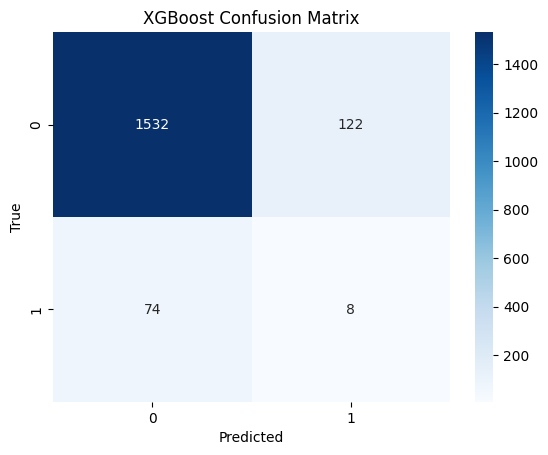

In [158]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Features Driving from Random Forest

In [265]:
important_features_rf = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance Score": rf_clf.feature_importances_
})

important_features_rf = important_features_rf.sort_values(by="Importance Score", ascending=False)

important_features_rf.head(5)

,Feature Name,Importance Score
4,mvsf_mrc_current_month,0.173887
5,mrc_current_month,0.165579
8,mvsf_br_amt_current_month,0.160244
9,rev_current_month,0.156005
10,billg_prov_state_cd_ab_ind_current_month,0.078710


Top Random Forest Features

In [266]:
top_rf_features = list(important_features_rf['Feature Name'].head(5))
print(top_rf_features)

['mvsf_mrc_current_month', 'mrc_current_month', 'mvsf_br_amt_current_month', 'rev_current_month', 'billg_prov_state_cd_ab_ind_current_month']


## KNN

In [160]:
accuracy_rates = list()
max_k = 10
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_rates.append((k, round(accuracy_score(y_test, y_pred), 4)))
    print('k = ', k, ' accuracy rate is : ', round(accuracy_score(y_test, y_pred), 4) * 100)

k =  1  accuracy rate is :  83.28999999999999
k =  2  accuracy rate is :  83.53
k =  3  accuracy rate is :  79.44
k =  4  accuracy rate is :  80.24
k =  5  accuracy rate is :  78.23
k =  6  accuracy rate is :  78.4
k =  7  accuracy rate is :  76.79
k =  8  accuracy rate is :  77.02
k =  9  accuracy rate is :  75.22999999999999


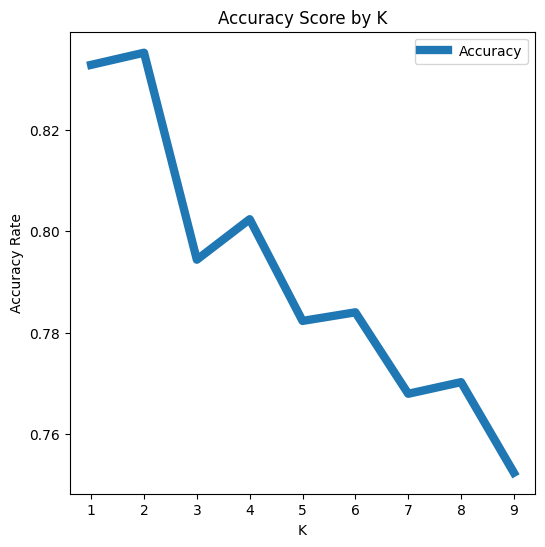

In [161]:
accuracy_results = pd.DataFrame(accuracy_rates, columns=['K', 'Accuracy'])

#Accuracy Plot
ax = accuracy_results.set_index('K').plot(figsize=(6, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Accuracy Rate')
ax.set_xticks(range(1, max_k))
plt.title('Accuracy Score by K')
plt.show()

In [162]:
model = KNeighborsClassifier(n_neighbors=2, weights='distance')
model.fit(X_train, y_train)

train_score = cross_val_score(model, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.9037980883588628


In [163]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8352534562211982


In [164]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.07741935483870968
Recall Score: 0.15
Precision Score: 0.05


Confusion Matrix

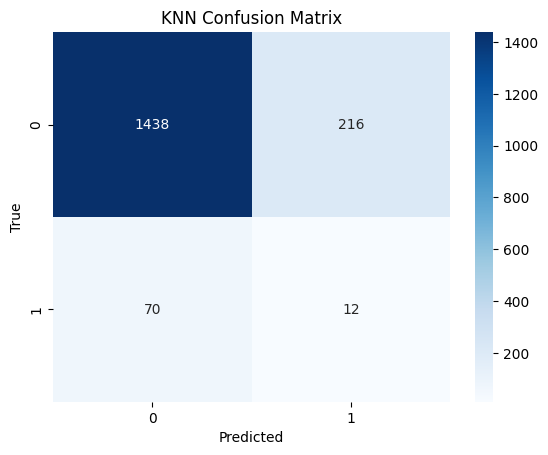

In [165]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN Confusion Matrix")
plt.show()

# Keep Most Importance Features From XGBoost and Random Forest

In [332]:
xgb_features_set = set(top_xgb_features[:3])
rf_features_set = set(top_rf_features[:3])

intersection_features = xgb_features_set.union(rf_features_set)
print(list(intersection_features)) 

['auto_payment_method_cd_dd_ind_current_month', 'billg_prov_state_cd_ab_ind_current_month', 'mrc_current_month', 'mvsf_br_amt_current_month', 'payment_method_cd_c_ind_current_month', 'mvsf_mrc_current_month']


In [333]:
ind_col = list(intersection_features) 

new_X_train = X_train[ind_col]
new_X_train.columns

Index(['auto_payment_method_cd_dd_ind_current_month',
       'billg_prov_state_cd_ab_ind_current_month', 'mrc_current_month',
       'mvsf_br_amt_current_month', 'payment_method_cd_c_ind_current_month',
       'mvsf_mrc_current_month'],
      dtype='object')

In [334]:
new_X_test = X_test[ind_col]
new_X_train.columns

Index(['auto_payment_method_cd_dd_ind_current_month',
       'billg_prov_state_cd_ab_ind_current_month', 'mrc_current_month',
       'mvsf_br_amt_current_month', 'payment_method_cd_c_ind_current_month',
       'mvsf_mrc_current_month'],
      dtype='object')

# Retrain Our Models

## XGBoost

In [335]:
new_X_train.shape

(13326, 6)

In [336]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(new_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [297]:
new_X_test.shape

(1736, 7)

In [337]:
train_score = cross_val_score(xgb_clf, new_X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(new_X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.8782101904462982
Accuracy: 0.8346774193548387


In [338]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.1276595744680851
Recall Score: 0.26
Precision Score: 0.09


Confusion Matrix

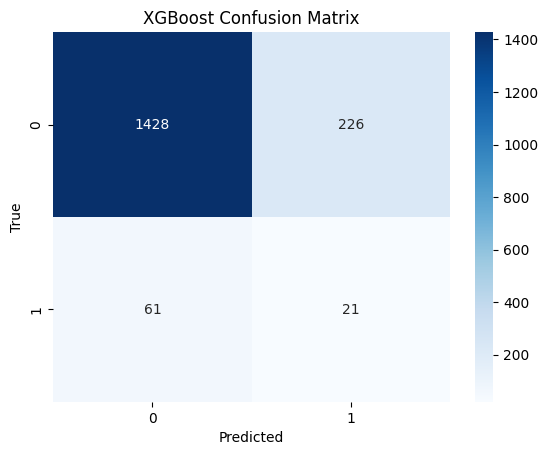

In [339]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Features Driving from XGBoost

In [340]:
importance_scores_xgb = xgb_clf.feature_importances_
important_features_xgb = pd.DataFrame({
    "Feature Name": new_X_train.columns,
    "Importance Score": importance_scores_xgb
})

important_features_xgb = important_features_xgb.sort_values(by="Importance Score", ascending=False)\

important_features_xgb

,Feature Name,Importance Score
1,billg_prov_state_cd_ab_ind_current_month,0.448844
0,auto_payment_method_cd_dd_ind_current_month,0.318872
4,payment_method_cd_c_ind_current_month,0.107206
5,mvsf_mrc_current_month,0.050385
3,mvsf_br_amt_current_month,0.039254
2,mrc_current_month,0.035439


## Random Forest

In [341]:
rf_clf = RandomForestClassifier()

rf_clf.fit(new_X_train, y_train)

RandomForestClassifier()

In [343]:
train_score = cross_val_score(rf_clf, new_X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = rf_clf.predict(new_X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.906125780976201
Accuracy: 0.8796082949308756


In [344]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.10300429184549356
Recall Score: 0.15
Precision Score: 0.08


Confusion Matrix

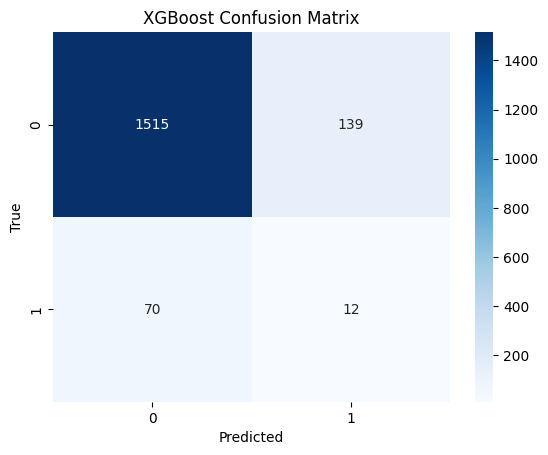

In [345]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Features Driving from Random Forest

In [346]:
important_features_rf = pd.DataFrame({
    "Feature Name": new_X_train.columns,
    "Importance Score": rf_clf.feature_importances_
})

important_features_rf = important_features_rf.sort_values(by="Importance Score", ascending=False)

important_features_rf.head(10)

,Feature Name,Importance Score
5,mvsf_mrc_current_month,0.312025
2,mrc_current_month,0.279327
3,mvsf_br_amt_current_month,0.274382
1,billg_prov_state_cd_ab_ind_current_month,0.074982
4,payment_method_cd_c_ind_current_month,0.038557
0,auto_payment_method_cd_dd_ind_current_month,0.020728


Top Random Forest Features

In [347]:
top_rf_features = list(important_features_rf['Feature Name'].head(5))
print(top_rf_features)

['mvsf_mrc_current_month', 'mrc_current_month', 'mvsf_br_amt_current_month', 'billg_prov_state_cd_ab_ind_current_month', 'payment_method_cd_c_ind_current_month']


## KNN

In [348]:
accuracy_rates = list()
max_k = 10
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(new_X_train, y_train)
    y_pred = knn.predict(new_X_test)
    accuracy_rates.append((k, round(accuracy_score(y_test, y_pred), 4)))
    print('k = ', k, ' accuracy rate is : ', round(accuracy_score(y_test, y_pred), 4) * 100)

k =  1  accuracy rate is :  83.17999999999999
k =  2  accuracy rate is :  83.64
k =  3  accuracy rate is :  80.65
k =  4  accuracy rate is :  81.45
k =  5  accuracy rate is :  79.44
k =  6  accuracy rate is :  78.97
k =  7  accuracy rate is :  77.71000000000001
k =  8  accuracy rate is :  77.07000000000001
k =  9  accuracy rate is :  76.55999999999999


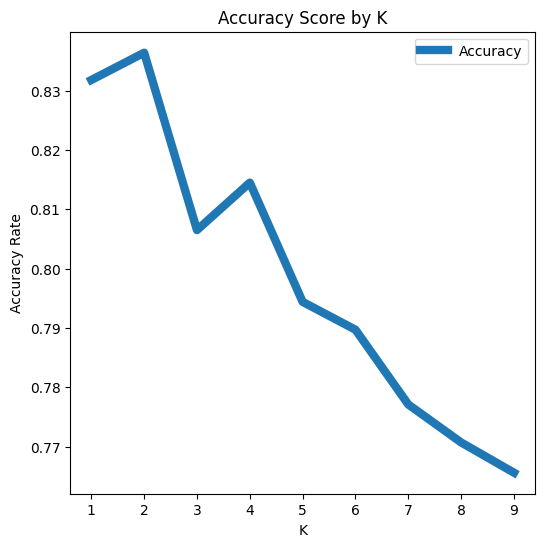

In [349]:
accuracy_results = pd.DataFrame(accuracy_rates, columns=['K', 'Accuracy'])

#Accuracy Plot
ax = accuracy_results.set_index('K').plot(figsize=(6, 6), linewidth=6)
ax.set(xlabel='K', ylabel='Accuracy Rate')
ax.set_xticks(range(1, max_k))
plt.title('Accuracy Score by K')
plt.show()

In [350]:
model = KNeighborsClassifier(n_neighbors=2, weights='distance')
model.fit(new_X_train, y_train)

train_score = cross_val_score(model, new_X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

Training Score: 0.8863129759925912


In [351]:
y_pred = model.predict(new_X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.836405529953917


In [352]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.08974358974358974
Recall Score: 0.17
Precision Score: 0.06


Confusion Matrix

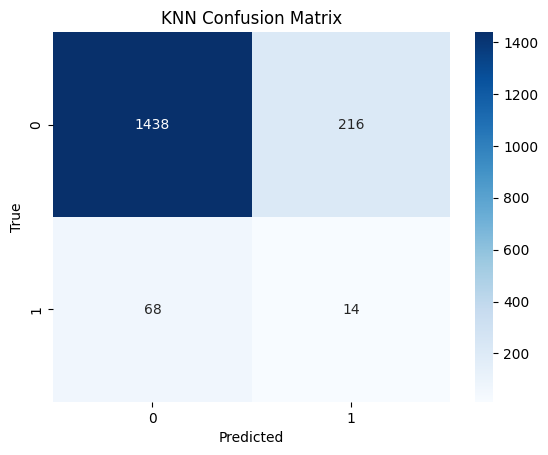

In [353]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("KNN Confusion Matrix")
plt.show()